# This Notebook is for some EDA to make cool charts for presentation purposes

In [1]:
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time

# third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
steam = pd.read_csv('./data/steamdfcleaned.csv')
steam #Opening and checking the database, let's see our labels for Categories and Genres since both are lists

,AppID,Name,Description,Publisher,Developer,Release_Date,Price,Categories,Genres,Tags,Total_Reviews,Sentiment
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,"Nov 1, 2000",9.99,"['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",205327,0.974860
1,20,Team Fortress Classic,One of the most popular online action games of...,Valve,Valve,"Apr 1, 1999",4.99,"['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],"Action,FPS,Multiplayer,Classic,HeroShooter,Sho...",6716,0.861823
2,30,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,Valve,Valve,"May 1, 2003",4.99,"['Multi-player', 'Valve Anti-Cheat enabled']",['Action'],"FPS,WorldWarII,Multiplayer,Shooter,Action,War,...",5786,0.902523
3,40,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,Valve,Valve,"Jun 1, 2001",4.99,"['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],"Action,FPS,Classic,Multiplayer,Shooter,First-P...",2387,0.818182
4,50,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,Valve,Gearbox Software,"Nov 1, 1999",4.99,"['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",15489,0.951837
...,...,...,...,...,...,...,...,...,...,...,...,...
15987,2095450,Tiny Tactics,Tiny Tactics is a Tower Defense game with a <i...,Tiny Forge Gaming,Tiny Forge Gaming,"Aug 5, 2022",9.99,"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'Strategy']","Strategy,TowerDefense,D,Top-Down,Cartoony,Fant...",391,0.859335
15988,2097720,Black Market of Bulletphilia ~ 100th Black Ma...,東方Project第18.5弾<br>上海アリス幻樂団による弾幕シューティング！<br><b...,"Mediascape Co., Ltd.",上海アリス幻樂団,"Aug 14, 2022",14.99,"['Single-player', 'Partial Controller Support'...","['Action', 'Indie']","ShootEmUp,Shooter,FemaleProtagonist,D,Action,F...",379,0.831135
15989,2103640,Axis Football 2023,<strong>Axis Football 2023 features completely...,Axis Games,Axis Games,"Sep 7, 2022",19.99,"['Single-player', 'Multi-player', 'PvP', 'Shar...","['Indie', 'Simulation', 'Sports', 'Strategy']","Sports,Simulation,Strategy,Football,Management...",115,0.895652
15990,2111630,JR EAST Train Simulator,Ongakukan and JR East have teamed up to bring ...,East Japan Railway Company,"ONGAKUKAN Co.,Ltd.","Sep 19, 2022",9.99,['Single-player'],"['Simulation', 'Early Access']","Simulation,Trains,Driving,Transportation,DPlat...",272,0.735294


In [3]:
def extract_labels(df, column):
    '''
    Returns a dictionary containing labels and their game counts from the dataframe
    Arguments:
    df: dataframe containing the column
    column: column name containing string values delimited by commas
    '''
    labels_dict = {}
    for labels in df[column]:
        split_labels = labels.split(',')
        for x in split_labels:
            #generate count values for each label corresponding to the number of games with that label
            if x not in labels_dict:
                labels_dict[x] = 1
            else:
                labels_dict[x] += 1
    return labels_dict

In [4]:
categories = extract_labels(steam, 'Categories')
categories
#Super bad, need to fix a lot more stuff

{"['Multi-player'": 957,
 " 'PvP'": 2606,
 " 'Online PvP'": 2146,
 " 'Shared/Split Screen PvP'": 876,
 " 'Valve Anti-Cheat enabled']": 38,
 " 'Valve Anti-Cheat enabled'": 69,
 " 'Remote Play Together']": 1678,
 "['Single-player'": 13142,
 " 'Multi-player'": 3733,
 "['Un jugador'": 3,
 " 'Multijugador'": 1,
 " 'JcJ'": 2,
 " 'JcJ en línea'": 2,
 " 'Steam Cloud'": 3036,
 " 'Con sist. antitrampas de Valve'": 1,
 " 'Remote Play en móvil'": 2,
 " 'Remote Play en tableta'": 1,
 " 'Steam Achievements'": 9279,
 " 'Steam Trading Cards'": 5041,
 " 'Captions available'": 418,
 " 'Partial Controller Support'": 1568,
 " 'Includes Source SDK'": 12,
 " 'Remote Play on Phone'": 528,
 " 'Remote Play on Tablet'": 386,
 " 'Cross-Platform Multiplayer'": 856,
 " 'Stats'": 765,
 " 'Includes Source SDK']": 17,
 " 'Commentary available'": 35,
 " 'Includes level editor'": 240,
 " 'Steam Workshop'": 892,
 " 'In-App Purchases'": 389,
 " 'Remote Play on Tablet']": 278,
 " 'Co-op'": 2359,
 " 'Full controller suppor

In [5]:
steam.Categories = steam.Categories.str.replace('[','').str.replace(']','').str.replace("'",'').str.replace(" ",'').str.replace("-",'').str.replace(",,",',')

C:\Users\charl\AppData\Local\Temp\ipykernel_1296\4221295749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  steam.Categories = steam.Categories.str.replace('[','').str.replace(']','').str.replace("'",'').str.replace(" ",'').str.replace("-",'').str.replace(",,",',')


In [6]:
dict(sorted(categories.items(), key=lambda item: item[1])).keys()
#This is a sorted (based off values) list of all the items and we just need the keys one

dict_keys([" 'Multijugador'", " 'Con sist. antitrampas de Valve'", " 'Remote Play en tableta'", " 'Remote Play auf Smartphones'", " 'Remote Play auf Tablets'", " 'Teilweise Controllerunterstützung']", " 'Online-Koop'", " 'Untertitel verfügbar'", " 'Teilweise Controllerunterstützung'", " 'Enthält Level-Editor']", "['Giocatore singolo'", " 'Multigiocatore'", " 'Co-op locale a schermo condiviso'", " 'Schermo condiviso'", " 'Achievement di Steam'", " 'Supporto completo per i controller'", " 'Carte collezionabili di Steam'", " 'Sottotitoli disponibili'", " 'Statistiche'", " 'Include editor dei livelli'", " 'Remote Play sul telefono'", " 'Remote Play sul tablet'", " 'Remote Play sulla TV'", "['MMO']", " 'PvP']", "['Jednoosobowa'", " 'Osiągnięcia Steam'", " 'Pełna obsługa kontrolerów'", " 'Karty kolekcjonerskie Steam'", " 'Zakupy w aplikacji'", "['Однокористувацька гра'", " 'Багатокористувацька гра'", " 'Гравець проти гравця'", " 'Гравець проти гравця в мережі'", " 'Кооперативна гра'", " 'Мер

In [7]:
Cattoremove = ['Consist.antitrampasdeValve', 'RemotePlayaufSmartphones', 'RemotePlayaufTablets', 'Online-Koop', 'Untertitelverfügbar', 'EnthältLevel-Editor', 'Giocatoresingolo', 'Multigiocatore', 'Co-oplocaleaschermocondiviso', 'Schermocondiviso', 'AchievementdiSteam', 'Supportocompletopericontroller', 'CartecollezionabilidiSteam', 'Sottotitolidisponibili', 'Statistiche', 'Includeeditordeilivelli', 'RemotePlaysultelefono', 'RemotePlaysultablet', 'RemotePlaysullaTV', 'Jednoosobowa', 'OsiągnięciaSteam', 'Pełnaobsługakontrolerów', 'KartykolekcjonerskieSteam', 'Zakupywaplikacji', 'Однокористувацькагра', 'Багатокористувацькагра', 'Гравецьпротигравця', 'Гравецьпротигравцявмережі', 'Кооперативнагра', 'Мережевакооперативнагра', 'КолекційнікарткиSteam', 'Придбаннявзастосунку', 'Частковапідтримкаконтролерів', 'RemotePlayнателефоні', 'RemotePlayнапланшеті', 'Umjogador', 'ConquistasSteam', 'Compat.totalcomcontrole', 'CartasColecionáveisSteam', 'NuvemSteam', 'CromosdeSteam', 'Comprasdentrodelaaplicación', 'Дляодногоигрока', 'Длянесколькихигроков', 'Противигроков', 'Противигроков(посети)', 'Противигроков(общийэкран)', 'ДостиженияSteam', 'Контроллер(полностью)', 'RemotePlayнателевизоре', 'Enkeltspiller', 'Steam-prestasjoner', 'Delvisstøtteforkontroller', 'Statistikk', 'Compat.parcialconmando', 'Multijugador', 'JcJ', 'JcJenlínea', 'RemotePlayenmóvil', 'RemotePlayentableta', 'VolleControllerunterstützung', 'RemotePlayaufTV-Geräten', 'Mods', 'Mods(requireHL)', 'Mehrspieler', 'Koop', 'TeilweiseControllerunterstützung', 'Steam-Sammelkarten', 'LogrosdeSteam', 'Compat.totalconmando', 'Unjugador', 'Steam-Errungenschaften', 'Einzelspieler', 'IncludesSourceSDK', 'SteamTurnNotifications', 'ValveAnti-Cheatenabled', 'VRSupport', 'LANCo-op', 'LANPvP', 'MMO', 'Captionsavailable','Online', 'EnthältLevelEditor', 'Cooplocaleaschermocondiviso', 'вмережі', '(посети)', '(общийэкран)', 'Контроллер(полностью)', 'Steamprestasjoner', 'enlínea', 'RemotePlayaufTVGeräten', '(requireHL)', 'SteamSammelkarten', 'SteamErrungenschaften', 'Commentaryavailable', 'Контроллер(полностью)', '()', 'Steam Achievements', 'ValveAntiCheatenabled', 'SteamTradingCards', 'SteamLeaderboards', 'SteamCloud', 'PartialControllerSupport', 'SteamAchievements', 'RemotePlayonTablet', 'RemotePlayonPhone', 'Fullcontrollersupport']
for text in Cattoremove:
    steam.Categories = steam.Categories.str.replace(text, "")
steam.Categories = steam.Categories.str.replace('PvP,PvP', "PvP").str.replace('Coop,Coop', "Coop").str.replace(",,,,",',').str.replace(",,,",',').str.replace(",,",',')
#THis is making alist and cleaning some duplicates as well as the just creating the list of things to remove

C:\Users\charl\AppData\Local\Temp\ipykernel_1296\3228951672.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  steam.Categories = steam.Categories.str.replace(text, "")


In [8]:
dict(sorted(categories.items(), key=lambda item: item[1])).keys()
#This is a sorted (based off values) list of all the items and we just need the keys one

dict_keys([" 'Multijugador'", " 'Con sist. antitrampas de Valve'", " 'Remote Play en tableta'", " 'Remote Play auf Smartphones'", " 'Remote Play auf Tablets'", " 'Teilweise Controllerunterstützung']", " 'Online-Koop'", " 'Untertitel verfügbar'", " 'Teilweise Controllerunterstützung'", " 'Enthält Level-Editor']", "['Giocatore singolo'", " 'Multigiocatore'", " 'Co-op locale a schermo condiviso'", " 'Schermo condiviso'", " 'Achievement di Steam'", " 'Supporto completo per i controller'", " 'Carte collezionabili di Steam'", " 'Sottotitoli disponibili'", " 'Statistiche'", " 'Include editor dei livelli'", " 'Remote Play sul telefono'", " 'Remote Play sul tablet'", " 'Remote Play sulla TV'", "['MMO']", " 'PvP']", "['Jednoosobowa'", " 'Osiągnięcia Steam'", " 'Pełna obsługa kontrolerów'", " 'Karty kolekcjonerskie Steam'", " 'Zakupy w aplikacji'", "['Однокористувацька гра'", " 'Багатокористувацька гра'", " 'Гравець проти гравця'", " 'Гравець проти гравця в мережі'", " 'Кооперативна гра'", " 'Мер

In [9]:
categories
#Looks good, two small issues in there

{"['Multi-player'": 957,
 " 'PvP'": 2606,
 " 'Online PvP'": 2146,
 " 'Shared/Split Screen PvP'": 876,
 " 'Valve Anti-Cheat enabled']": 38,
 " 'Valve Anti-Cheat enabled'": 69,
 " 'Remote Play Together']": 1678,
 "['Single-player'": 13142,
 " 'Multi-player'": 3733,
 "['Un jugador'": 3,
 " 'Multijugador'": 1,
 " 'JcJ'": 2,
 " 'JcJ en línea'": 2,
 " 'Steam Cloud'": 3036,
 " 'Con sist. antitrampas de Valve'": 1,
 " 'Remote Play en móvil'": 2,
 " 'Remote Play en tableta'": 1,
 " 'Steam Achievements'": 9279,
 " 'Steam Trading Cards'": 5041,
 " 'Captions available'": 418,
 " 'Partial Controller Support'": 1568,
 " 'Includes Source SDK'": 12,
 " 'Remote Play on Phone'": 528,
 " 'Remote Play on Tablet'": 386,
 " 'Cross-Platform Multiplayer'": 856,
 " 'Stats'": 765,
 " 'Includes Source SDK']": 17,
 " 'Commentary available'": 35,
 " 'Includes level editor'": 240,
 " 'Steam Workshop'": 892,
 " 'In-App Purchases'": 389,
 " 'Remote Play on Tablet']": 278,
 " 'Co-op'": 2359,
 " 'Full controller suppor

In [10]:
genres = extract_labels(steam, 'Genres')
#Same issue as categories

In [11]:
#Doing the same to Genres as I did for Categories
steam.Genres = steam.Genres.str.replace('[','').str.replace(']','').str.replace("'",'').str.replace(" ",'').str.replace("-",'').str.replace(",,",',')

C:\Users\charl\AppData\Local\Temp\ipykernel_1296\3684430286.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  steam.Genres = steam.Genres.str.replace('[','').str.replace(']','').str.replace("'",'').str.replace(" ",'').str.replace("-",'').str.replace(",,",',')


In [12]:
genres = extract_labels(steam, 'Genres')
#Super bad, need to fix a lot more stuff

In [13]:
dict(sorted(genres.items(), key=lambda item: item[1])).keys()
#This is a sorted (based off values) list of all the items and we just need the keys one

dict_keys(['Avventura', 'Akcja', 'Przygodowe', 'Бойовики', 'Movie', 'Multijugadormasivo', 'Estrategia', 'Инди', 'Симуляторы', 'Спортивныеигры', 'Eventyr', 'Lettbeint', 'Gratisåspille', 'Rol', 'Deportes', 'Aventura', 'Acción', 'Aktion', 'Rollenspiel', 'Abenteuer', 'PhotoEditing', 'AudioProduction', 'SoftwareTraining', 'Education', 'VideoProduction', 'GameDevelopment', 'WebPublishing', 'SexualContent', 'Nudity', 'Animation&Modeling', 'Design&Illustration', 'Gore', 'Utilities', 'Violent', 'Racing', 'Sports', 'MassivelyMultiplayer', 'EarlyAccess', 'FreetoPlay', 'RPG', 'Simulation', 'Strategy', 'Casual', 'Adventure', 'Action', 'Indie'])

In [14]:
Genrestoremove = ['Avventura', 'Akcja', 'Przygodowe', 'Бойовики', 'Movie', 'Multijugadormasivo', 'Estrategia', 'Инди', 'Симуляторы', 'Спортивныеигры', 'Eventyr', 'Lettbeint', 'Gratisåspille', 'Rol', 'Deportes', 'Rollenspiel', 'Aventura', 'Acción', 'Aktion', 'Abenteuer']
for text in Genrestoremove:
    steam.Genres = steam.Genres.str.replace(text, "")
#team.Categories = steam.Categories.str.replace('PvP,PvP', "PvP").str.replace('Coop,Coop', "Coop").str.replace(",,,,",',').str.replace(",,,",',').str.replace(",,",',')
#THis is making alist and cleaning some duplicates as well as the just creating the list of things to remove

In [15]:
genres = extract_labels(steam, 'Genres')
genres
#Looks a lot better

{'Action': 6841,
 '': 29,
 'FreetoPlay': 1844,
 'Strategy': 3677,
 'Adventure': 6539,
 'Indie': 10608,
 'RPG': 3535,
 'Animation&Modeling': 45,
 'VideoProduction': 21,
 'Casual': 4743,
 'Simulation': 3671,
 'Racing': 624,
 'MassivelyMultiplayer': 749,
 'Nudity': 35,
 'Violent': 92,
 'Sports': 741,
 'lenspiel': 4,
 'EarlyAccess': 1346,
 'Design&Illustration': 53,
 'Education': 20,
 'PhotoEditing': 12,
 'Utilities': 88,
 'GameDevelopment': 21,
 'Gore': 63,
 'WebPublishing': 22,
 'SoftwareTraining': 16,
 'AudioProduction': 15,
 'SexualContent': 33}

In [16]:
steam.Genres.value_counts()
#Looks a lot better

Action,Indie                                                 862
Adventure,Indie                                              802
Action                                                       710
Action,Adventure,Indie                                       707
Adventure,Casual,Indie                                       493
                                                            ... 
Violent,Action,Adventure,Indie,EarlyAccess                     1
Nudity,Violent,Gore,Action,Adventure,Indie                     1
Design&Illustration,EarlyAccess                                1
Action,Adventure,Casual,MassivelyMultiplayer,RPG,Strategy      1
Adventure,RPG,EarlyAccess                                      1
Name: Genres, Length: 1113, dtype: int64

In [17]:
tags = extract_labels(steam, 'Tags')
tags
#Seems kind of solid to be honest

{'Action': 7579,
 'FPS': 1498,
 'Multiplayer': 4007,
 'Shooter': 1962,
 'Classic': 971,
 'Team-Based': 340,
 'First-Person': 2429,
 'Competitive': 429,
 'Tactical': 959,
 'e-sports': 186,
 's': 596,
 'PvP': 997,
 'OldSchool': 490,
 'Military': 490,
 'Strategy': 4177,
 'Survival': 1555,
 'ScoreAttack': 214,
 'Assassin': 83,
 'Nostalgia': 101,
 'HeroShooter': 53,
 'Class-Based': 109,
 'Co-op': 1984,
 'Fast-Paced': 545,
 'Retro': 1550,
 'OnlineCo-Op': 1025,
 'Violent': 1264,
 'Funny': 2327,
 'Mod': 49,
 'Remake': 217,
 'WorldWarII': 323,
 'War': 657,
 'Historical': 694,
 'Singleplayer': 9365,
 'Difficult': 1964,
 'WorldWarI': 69,
 'ArenaShooter': 212,
 'Sci-fi': 1909,
 'Gore': 1310,
 'Aliens': 291,
 'Adventure': 7570,
 'Atmospheric': 3734,
 'StoryRich': 3364,
 'SilentProtagonist': 44,
 'GreatSoundtrack': 2894,
 'Puzzle': 2863,
 'Moddable': 429,
 'Space': 859,
 'Cyberpunk': 399,
 'Memes': 738,
 'Platformer': 1528,
 'PsychologicalHorror': 1353,
 'Conspiracy': 74,
 'D': 5536,
 'CultClassic':

In [18]:
steam.Categories = steam.Categories.replace({'^,':''}, regex=True)
steam.Genres = steam.Genres.replace({'^,':''}, regex=True)
steam.Categories = steam.Categories.replace({',\s*$', ""}, regex=True)
steam.Genres = steam.Genres.replace({',\s*$', ""}, regex=True)
steam.Tags = steam.Tags.replace({'^,':''}, regex=True)
steam.Tags = steam.Tags.replace({',\s*$', ""}, regex=True)
#Removing all faulty commas from the replace, aka the commas at the start and end of strings cause when they become lists it'll become an issue

In [19]:
genres = extract_labels(steam, 'Genres')
categories = extract_labels(steam, 'Categories')
tags = extract_labels(steam, 'Tags')

In [20]:
steam = steam.dropna()
#Dropping NA for all the things that are now empty and void aka non-English games

In [21]:
#Saving my sheet to a new thing, this should be relatively clean
steam.to_csv('./data/SteamCleaning.csv', index=False)

# Time to create some graphs and charts for top 10 Genres & Categories

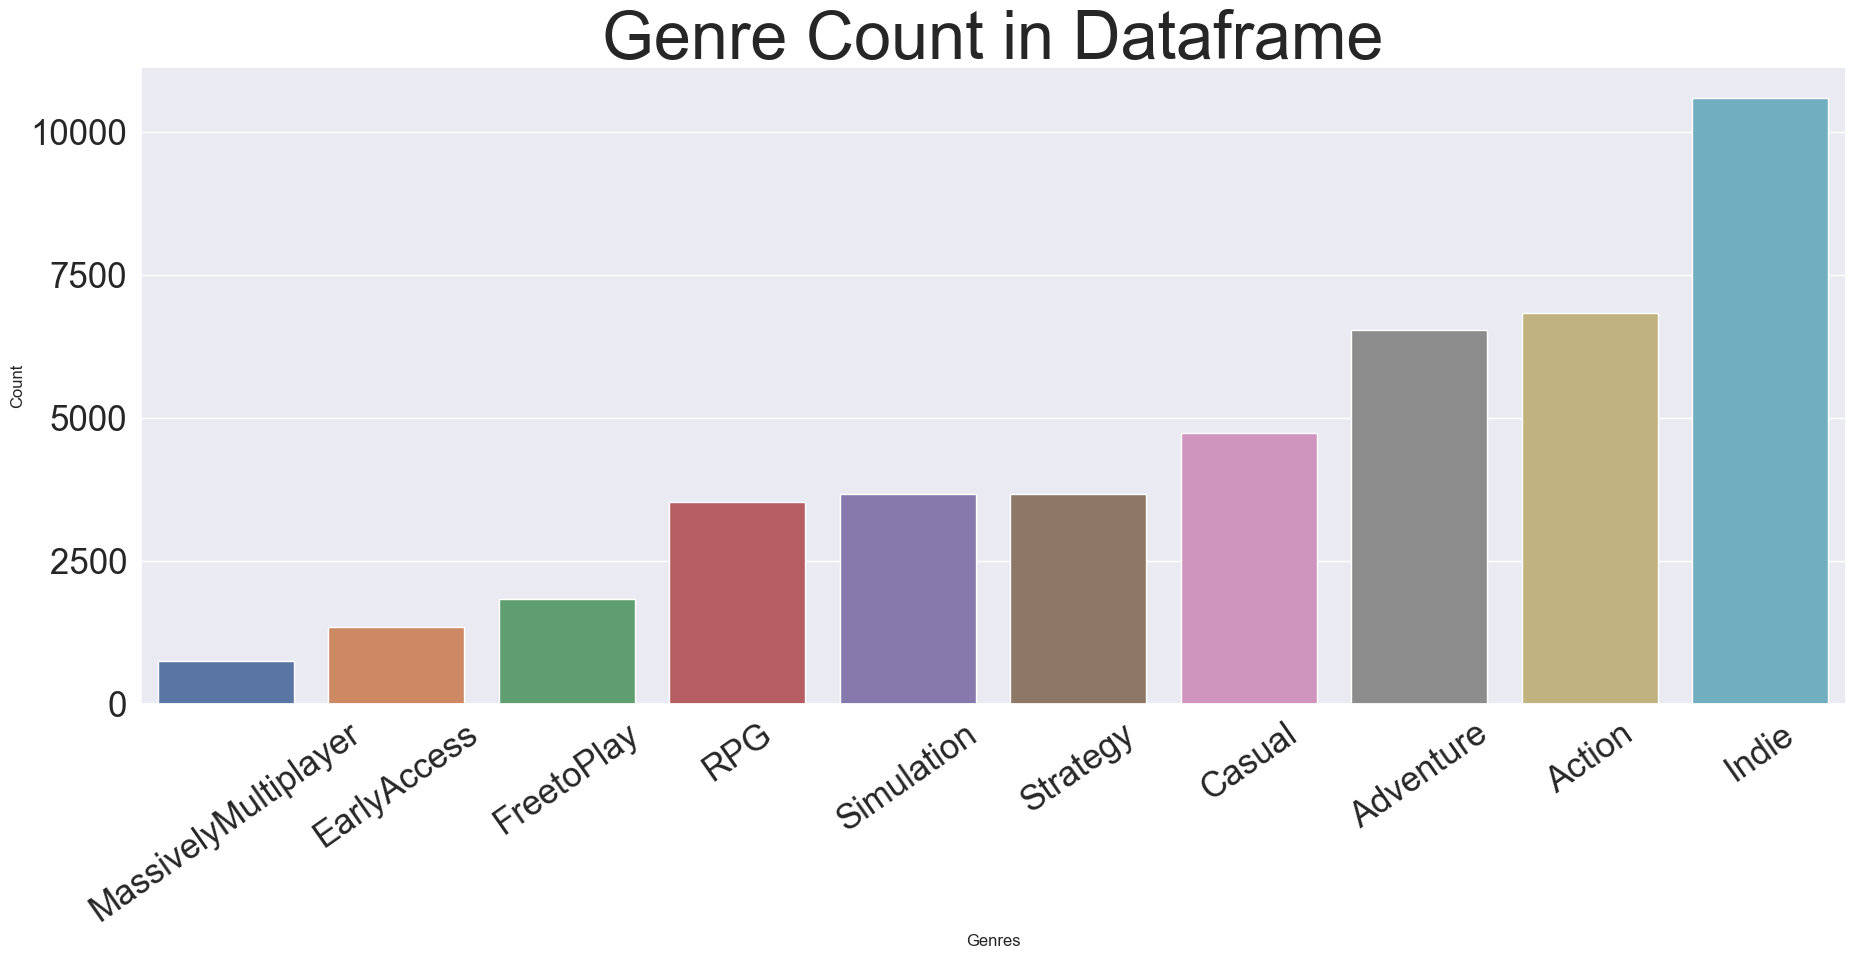

In [49]:
my_df = pd.DataFrame(sorted(genres.items(), key=lambda x: x[1])[-10:])
sns.set_theme(style='darkgrid')
ax = sns.barplot(x=0, y=1, data=my_df)
sns.set(rc={'figure.figsize':(22,8.27)})
sns.set(font_scale=4)
plt.xticks(rotation=35, fontsize=25)
plt.yticks(fontsize = 25)
ax.set(xlabel = 'Genres', ylabel='Count', title='Genre Count in Dataframe')
plt.savefig("./images/Genres.png") 


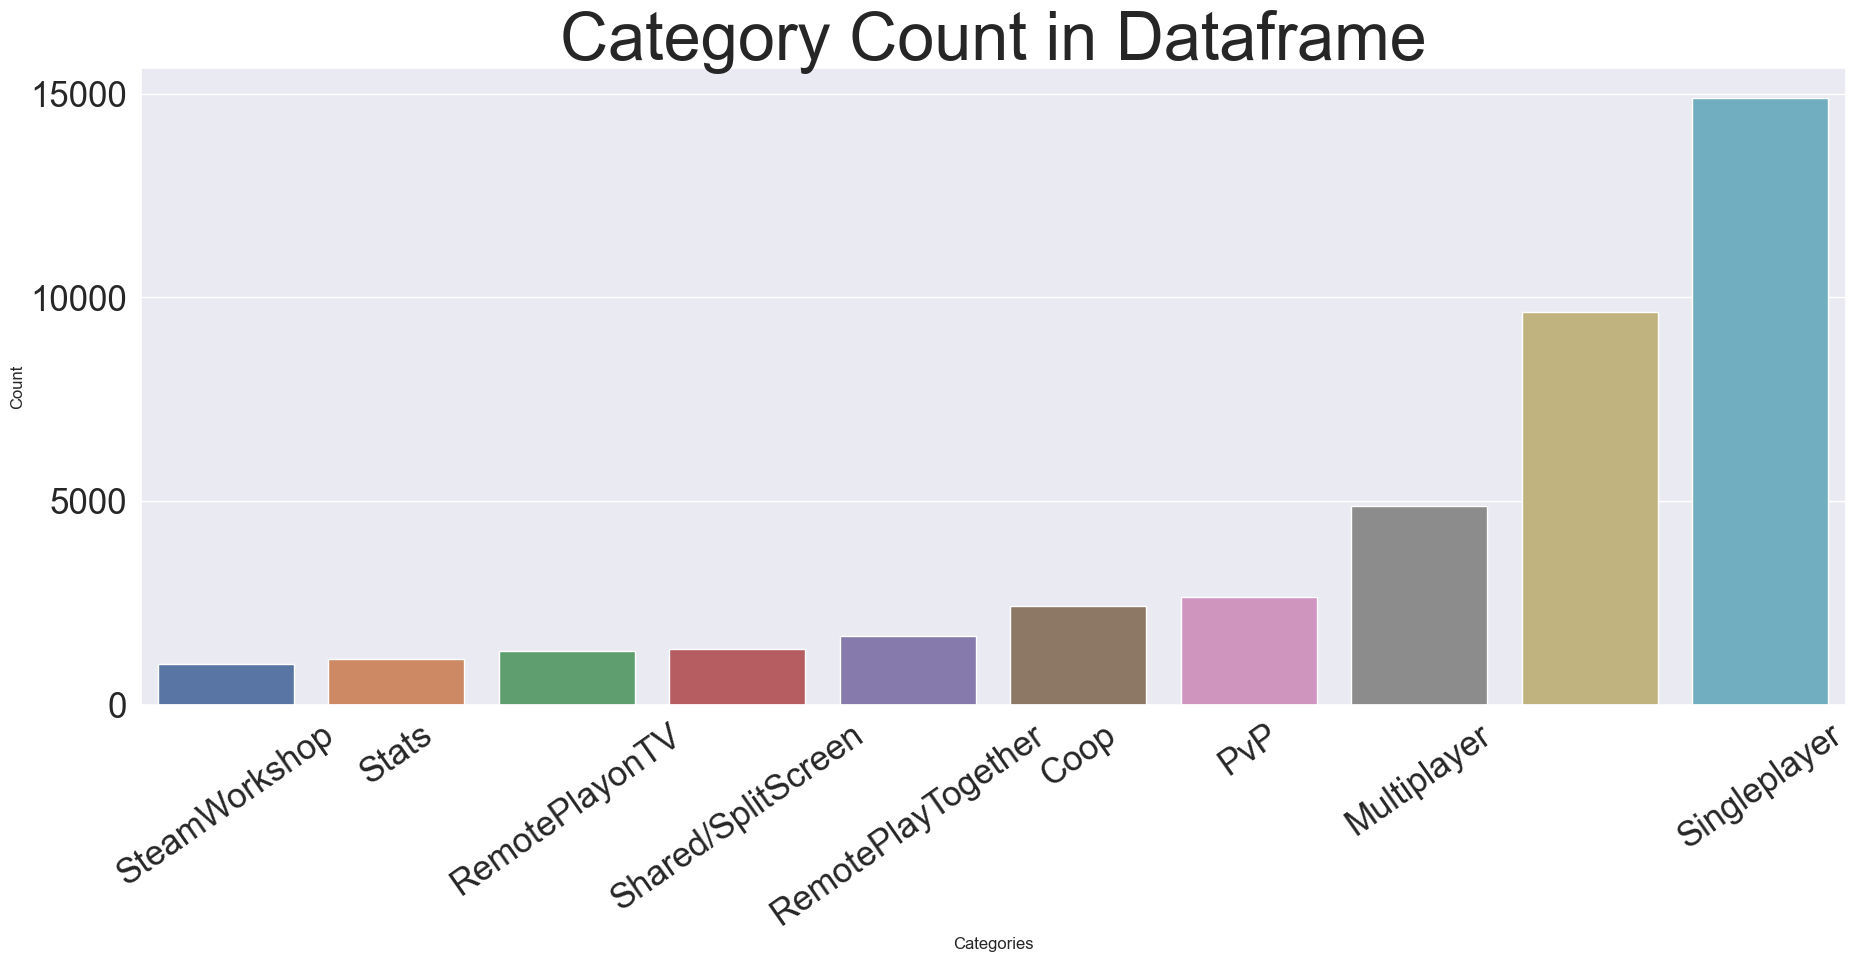

In [53]:
my_df = pd.DataFrame(sorted(categories.items(), key=lambda x: x[1])[-10:])
sns.set_theme(style='darkgrid')
ax = sns.barplot(x=0, y=1, data=my_df)
sns.set(rc={'figure.figsize':(22,8.27)})
sns.set(font_scale=4)
plt.xticks(rotation=35, fontsize=25)
plt.yticks(fontsize = 25)
ax.set(xlabel = 'Categories', ylabel='Count', title='Category Count in Dataframe')
plt.savefig("./images/Categories.png") 

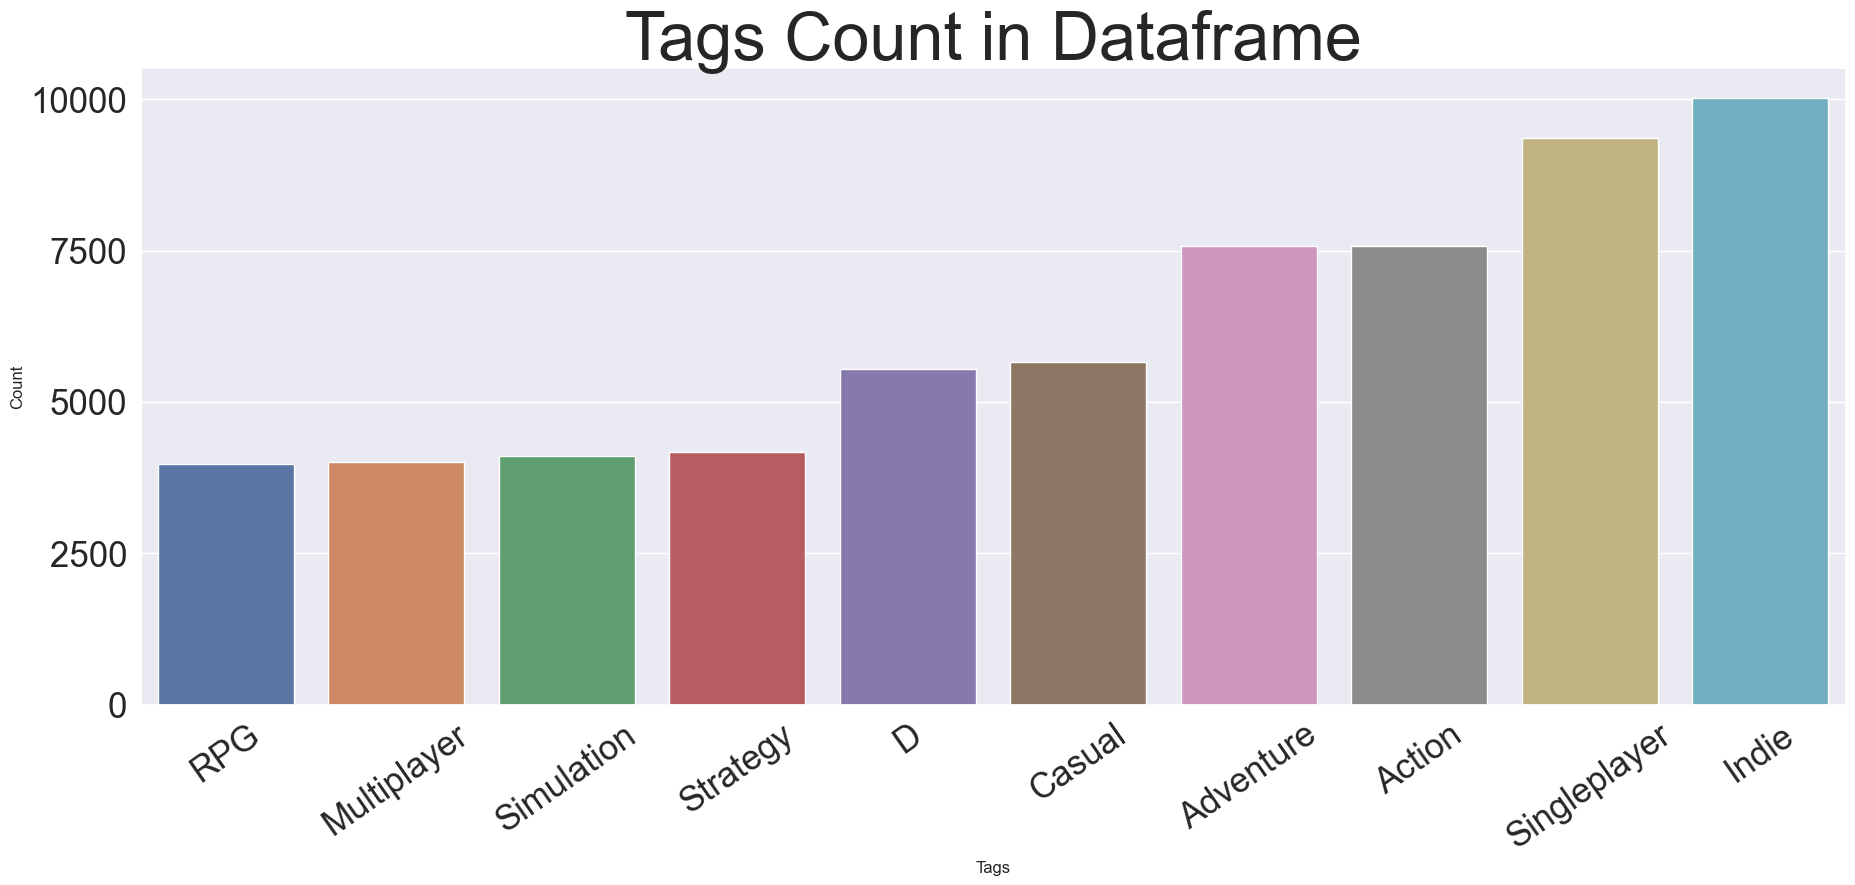

In [51]:
my_df = pd.DataFrame(sorted(tags.items(), key=lambda x: x[1])[-10:])
sns.set_theme(style='darkgrid')
ax = sns.barplot(x=0, y=1, data=my_df)
sns.set(rc={'figure.figsize':(22,8.27)})
sns.set(font_scale=4)
plt.xticks(rotation=35, fontsize=25)
plt.yticks(fontsize = 25)
ax.set(xlabel = 'Tags', ylabel='Count', title='Tags Count in Dataframe')
plt.savefig("./images/Tags.png") 